
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Convolutional Neural Network Operations


### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### Convolutional Neural Network Operators

Here's a simple workflow with an image (of my jeep or a brick wall) and the following convolutional neural network operators:

* convolution - a variety of filtersto detect features

* pooling - max pooling for dimensionality reduction

* depth-wise pooling, down sampling - summarization over and reduction in feature map depth

* activation - activation function to impart nonlinearity into the system, without activations, convolutions would collapse to a single convolution!

#### Objective 

I teach data analytics, geostatistics and machine learning. To demonstrate the basic operators applied in convolutional neural networks.  

* I use these examples in my lecture notes, see the lecture posted on my YouTube channel.

* gain experiential learning with the nuts and bolts of convolutional neural networks

Note, I just demonstrate the operators. There is no attempt to compile the steps into a practice convolutional neural network architecture.

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the image file to your working directory.  They are available here:

* Image File - [maple_side.jpg](https://github.com/GeostatsGuy/GeoDataSets/blob/master/maple_side.jpg)

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Load the required libraries

The following code loads the required libraries.

* we will need some standard packages. These should have been installed with Anaconda 3.

In [1]:
import os                                               # to set current working directory 
import sys                                              # supress output to screen
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                         # plotting
import matplotlib.gridspec as gridspec                  # control of subplot sizes
from ipywidgets import interactive                      # widgets and interactivity, I will make an intera
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox

from PIL import Image                                   # loading and working with images
from scipy import ndimage
import skimage.measure
import sklearn.preprocessing
from tensorflow.keras.layers import LeakyReLU           # activation function
#import matplotlib as mpl                               # option to increase image resolution, but slows application greatly
#mpl.rcParams['figure.dpi'] = 300                       

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see above) GSLIB executables in this directory or a location identified in the environmental variable *Path*.

In [2]:
os.chdir("c:/PGE383")                                   # set the working directory

#### Loading Image Data

We will load an image of my jeep.  Note, the application has been calibrated for my jeep images:

* their specific scale and position 

No attempt was made to generalize this application to any image.  

* the original wheel / tire specs and locations and sizes could be used or 

* an interesting machine learning problem to automatically find the current wheels and to modify them

Let's load those images:

Array shape: (106,520)


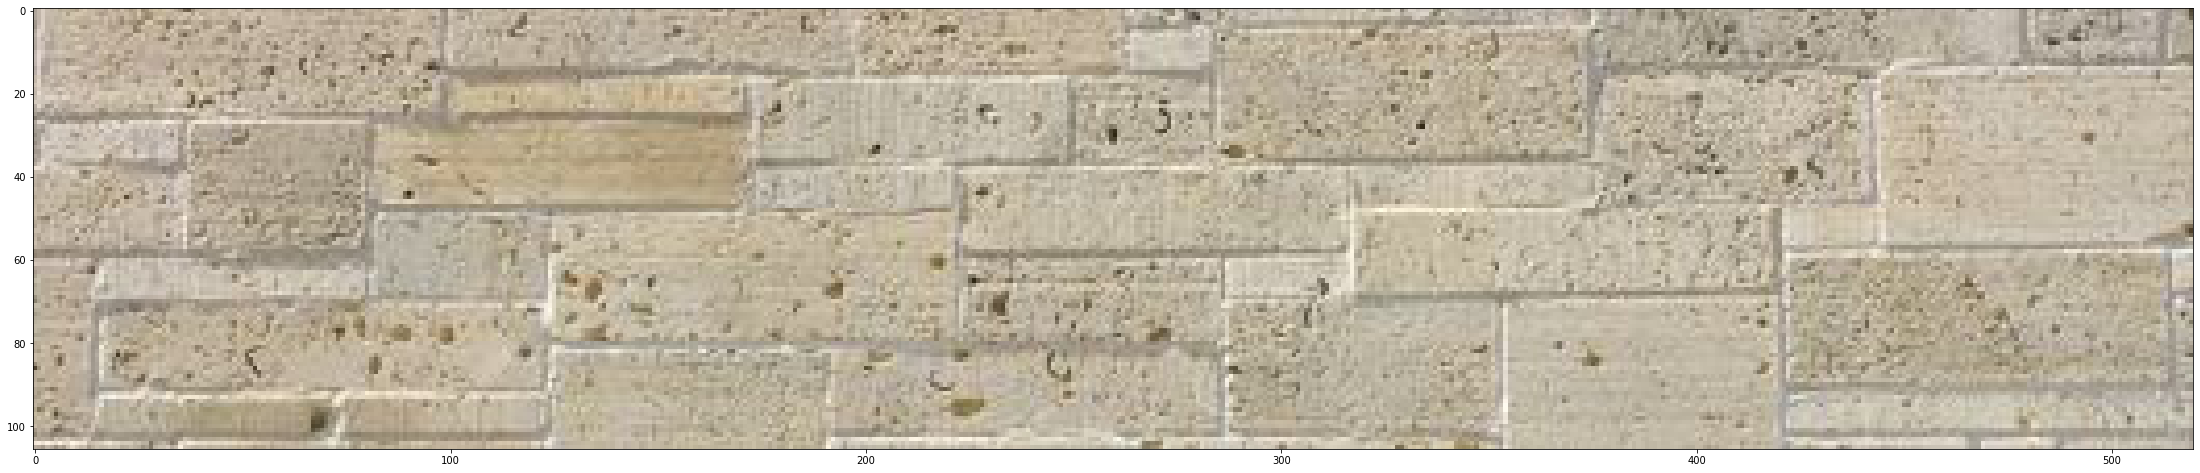

In [3]:
simple_example = True

if simple_example:
    img = Image.open("brick_wall.jpg")
    legend_fraction = 0.01
    plot = "21"
    
else:
    img = Image.open("maple_side.jpg")                  # load jeep images from the current directory    
    legend_fraction = 0.025
    plot = "12"
    
width, height = img.size                                # get the sizes of the images

print("Array shape: (" +str(img.size[1]) + "," + str(img.size[0]) +")")

plt.imshow(img)
plt.subplots_adjust(left=0.0, bottom=0.0, right=5.0, top=5.8, wspace=0.1, hspace=0.1)
plt.show()

#### Convert Image to ndarray

Let's convert the image to an ndarray so we can apply the various iomage operations applied in convolutional neurnetworks.

* note we will have 3 channels for RGB instensities

In [4]:
nd_img = np.array(img)

print("Array shape: " +str(nd_img.shape))

Array shape: (106, 520, 3)


#### Depth-wise Pooling, Down Sampling

Reduction in channels, depth of the featue maps.

* in this case we combine the RGB channels into one intensity channel

* we convert the image to a gray scale 

* I use the lambda function by unutby from [stackoverflow](https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python)

* we use the inferno colar scheme, because it is awesome and assists with observing contrasts while color blind friendly and without resulting in bias

Array shape: (106, 520)


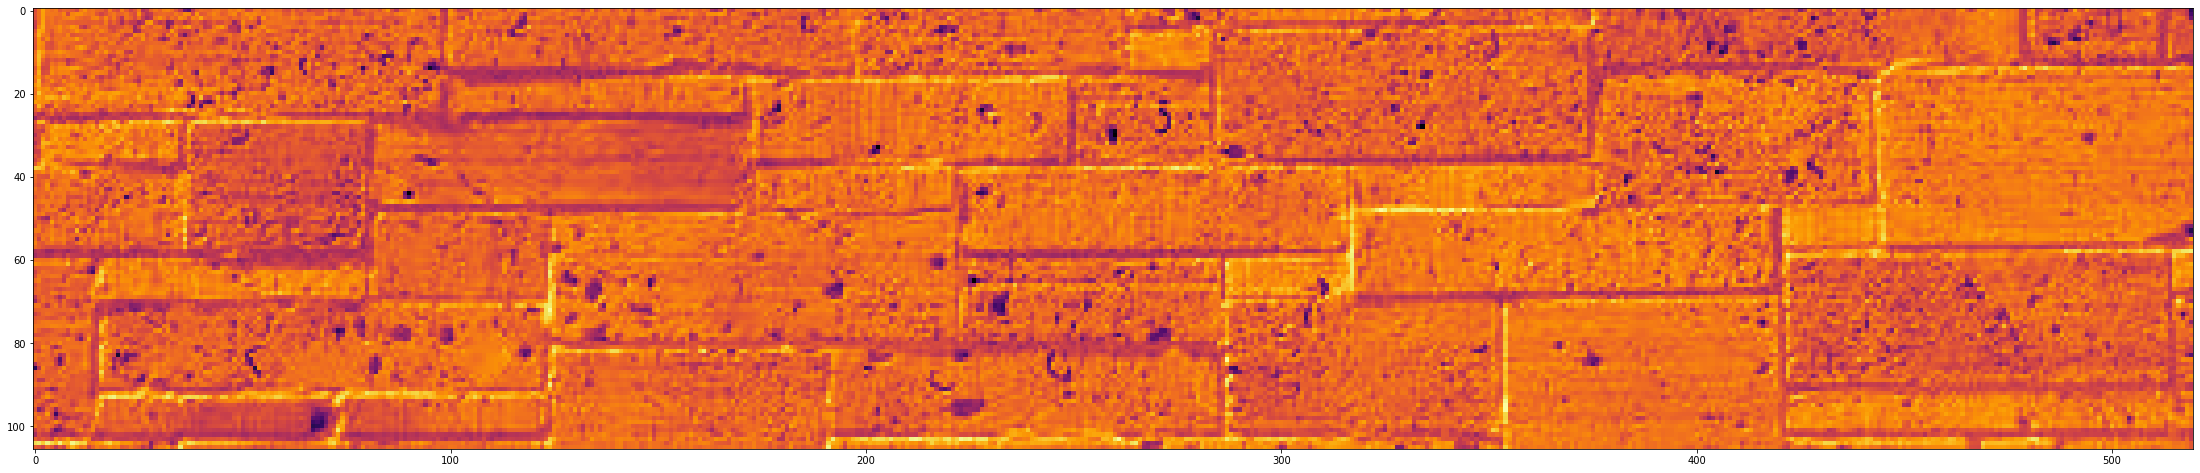

In [5]:
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) # conversion function by unutbu

bw_nd_img = gray(nd_img)                                      # apply the function to the image
print("Array shape: " +str(bw_nd_img.shape))

plt.subplot(111)
plt.imshow(bw_nd_img, cmap='inferno')

plt.subplots_adjust(left=0.0, bottom=0.0, right=5.0, top=2.8, wspace=0.1, hspace=0.1)
plt.show()

#### Batch Normalization

Application of standardization or minmax normalization to a feature map.

* in this case we apply minmax normalization to the 1 channel feature map.

* Normalize the values to have a minimum of -1.0 and a maximum of 1.0.

Array shape: (106, 520)


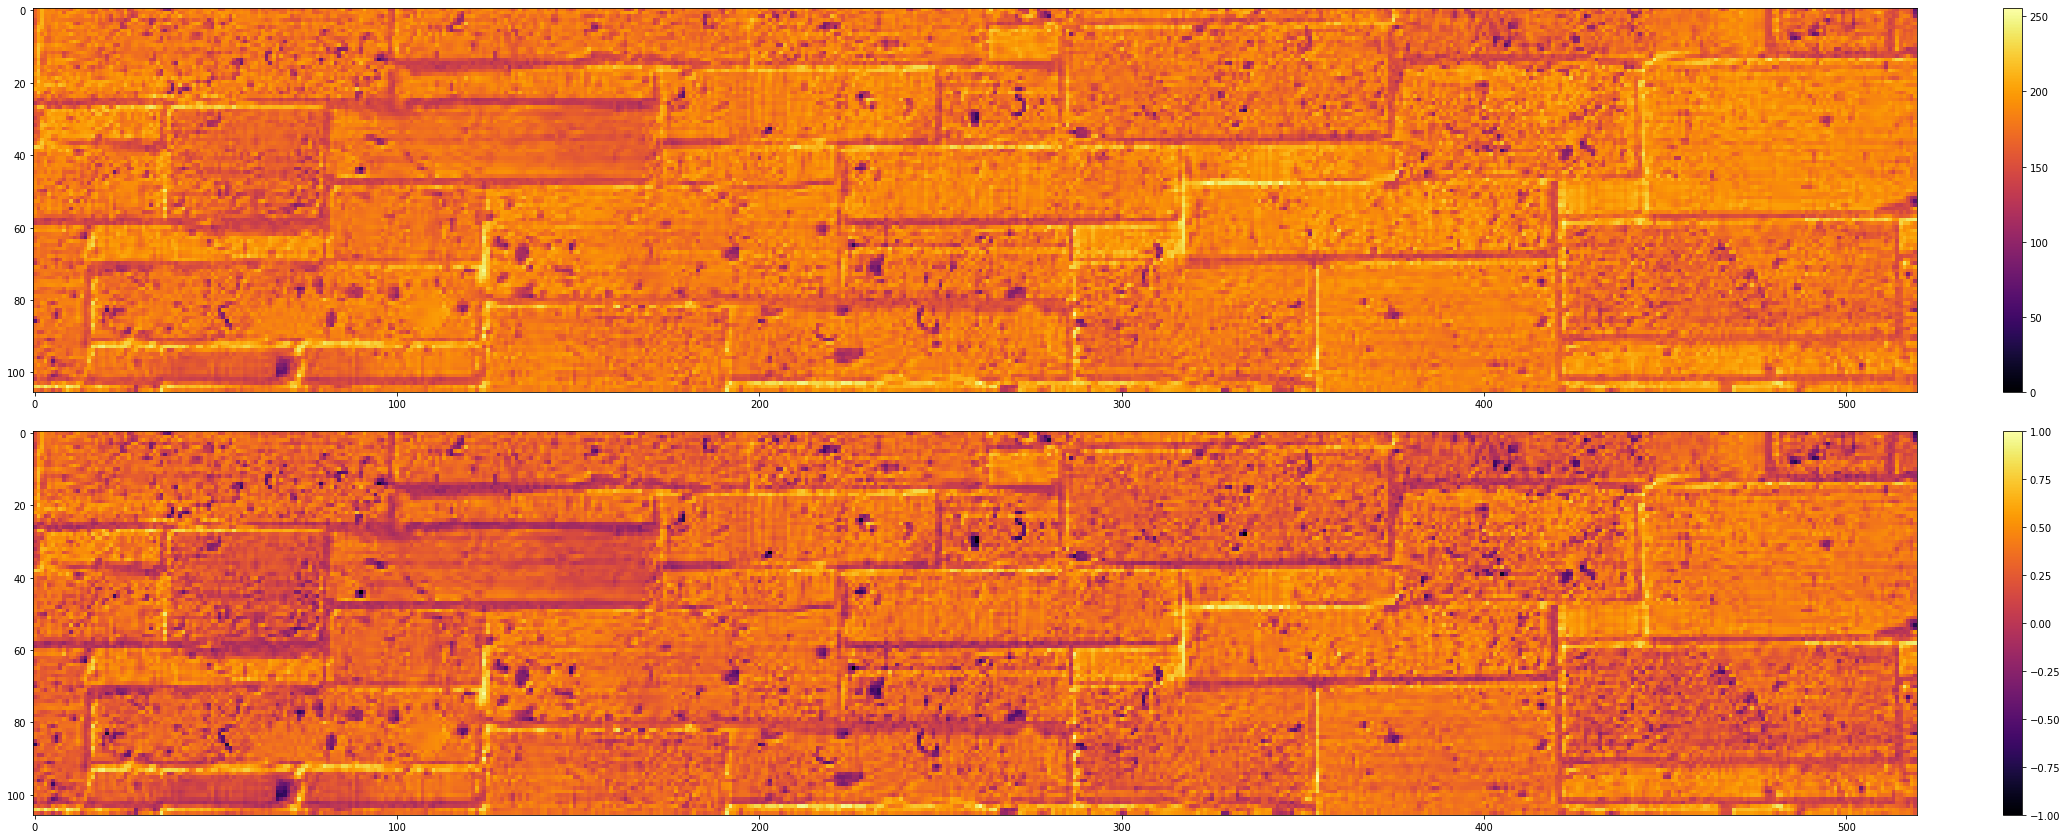

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (-1.0,1.0)).fit(bw_nd_img.flatten().reshape(-1, 1))
st_bw_nd_img = scaler.transform(bw_nd_img)

print("Array shape: " +str(st_bw_nd_img.shape))

plt.subplot(str(plot) + "1")
im1 = plt.imshow(bw_nd_img, cmap='inferno',vmin=0.0,vmax=255.0)
plt.colorbar(im1,fraction=legend_fraction, pad=0.04)

plt.subplot(str(plot) + "2")
im2 = plt.imshow(st_bw_nd_img, cmap='inferno',vmin=-1.0,vmax=1.0)
plt.colorbar(im2,fraction=legend_fraction, pad=0.04)
plt.subplots_adjust(left=0.0, bottom=0.0, right=5.0, top=2.8, wspace=0.1, hspace=0.1)
plt.show()

#### Convolution

Let's demonstrate convolution.

* you can modify the convolution filter

function from https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381

Array shape: (106, 520)


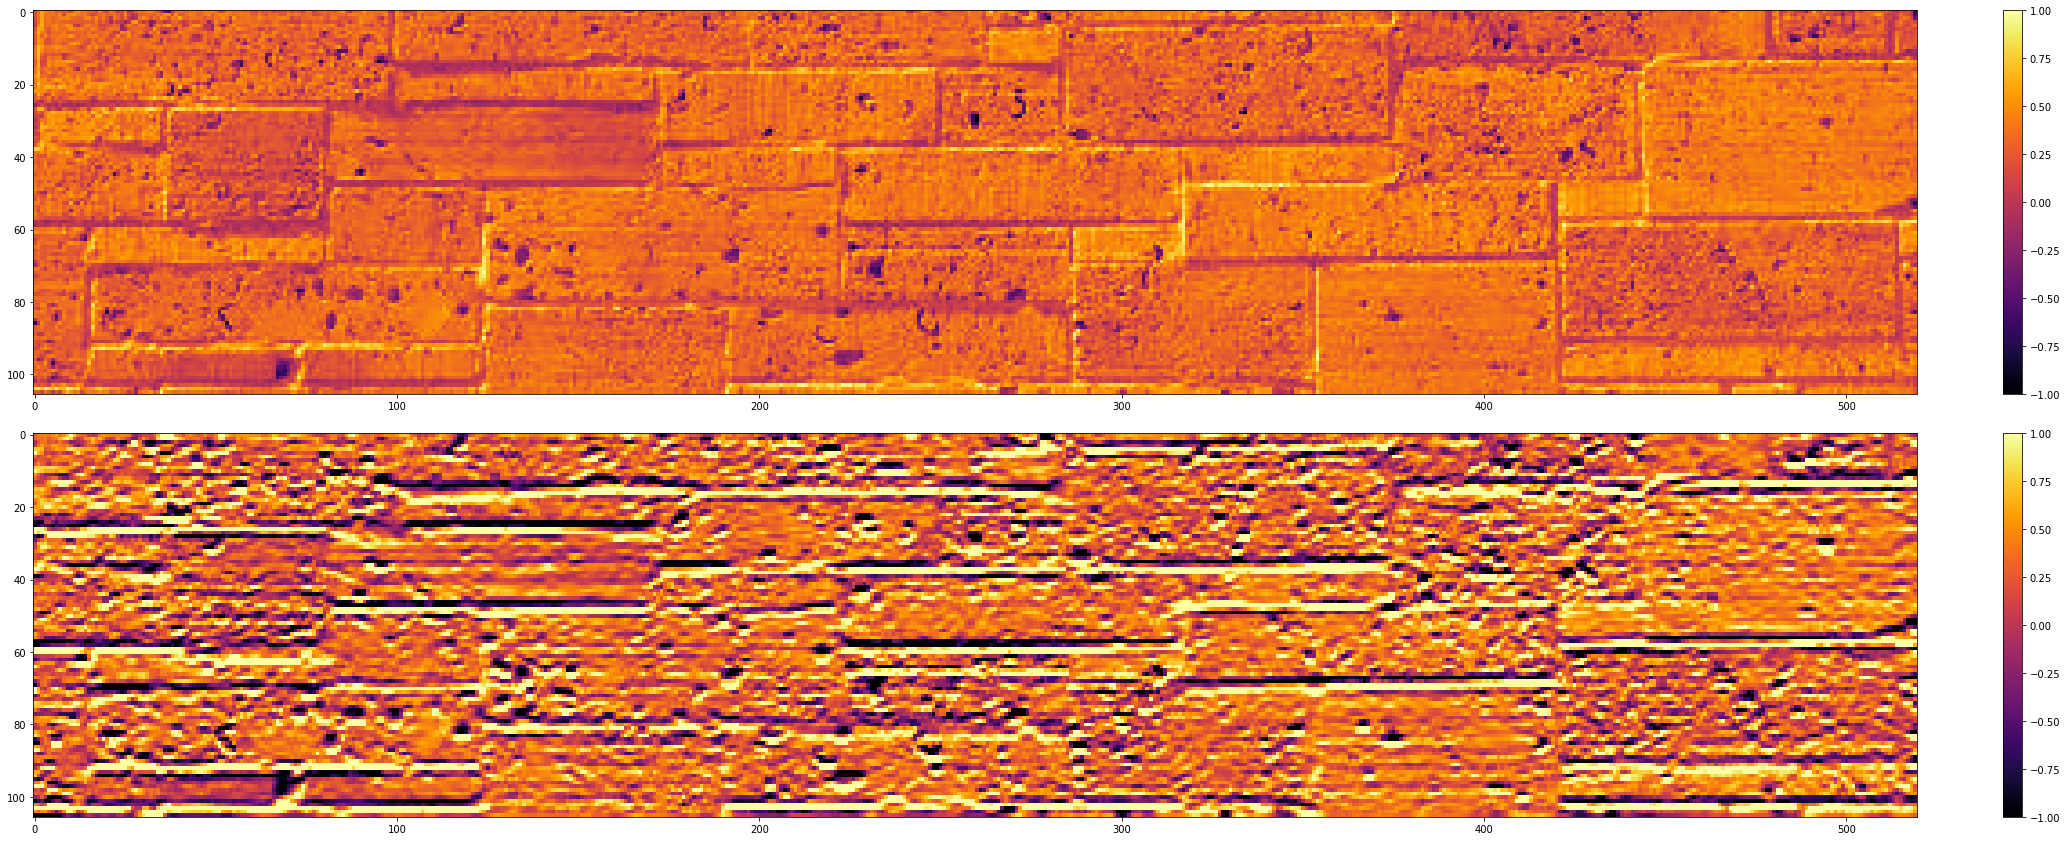

In [12]:
from scipy.ndimage import correlate1d
import sklearn

filter_type = "gradient_hor"

if filter_type == "custom":
    conv_filter = np.array([[0, -2, 0],
                            [-2, 10, -2],
                            [0, -2, 0]])

elif filter_type == "gradient_hori":
    conv_filter = np.array([[10/9, 1/9, -8/9],
                            [10/9, 1/9, -8/9],
                            [10/9, 1/9, -8/9]])
    
elif filter_type == "gradient_vert":
    conv_filter = np.array([[10/9, 10/9, 10/9],
                            [1/9, 1/9, 1/9],
                            [-8/9, -8/9, -8/9]])

elif filter_type == "edge":
    conv_filter = np.array([[-1, -1, -1], 
                           [-1, 9, -1], 
                           [-1, -1, -1]])
    
elif filter_type == "sharpen":
    conv_filter = np.array([[-1, -1, -1], 
                           [-1, 9, -1], 
                           [-1, -1, -1]])
    
elif filter_type == "blur":
    conv_filter = np.array([[1/9, 1/9, 1/9], 
                           [1/9, 1/9, 1/9], 
                           [1/9, 1/9, 1/9]])
      
conv_bw_nd_img = ndimage.convolve(st_bw_nd_img,weights=conv_filter)

print("Array shape: " + str(conv_bw_nd_img.shape))

plt.subplot(plt.subplot(str(plot) + "1"))
im1 = plt.imshow(st_bw_nd_img, cmap='inferno',vmin=-1.0,vmax=1.0)
plt.colorbar(im1,fraction=legend_fraction, pad=0.04)

plt.subplot(plt.subplot(str(plot) + "2"))
im2 = plt.imshow(conv_bw_nd_img, cmap='inferno',vmin=-1.0,vmax=1.0)
plt.colorbar(im2,fraction=legend_fraction, pad=0.04)

plt.subplots_adjust(left=0.0, bottom=0.0, right=5.0, top=2.8, wspace=0.1, hspace=0.1)
plt.show()

#### Max Pooling

Reduce the number of nodes by taking the maximum value over a window

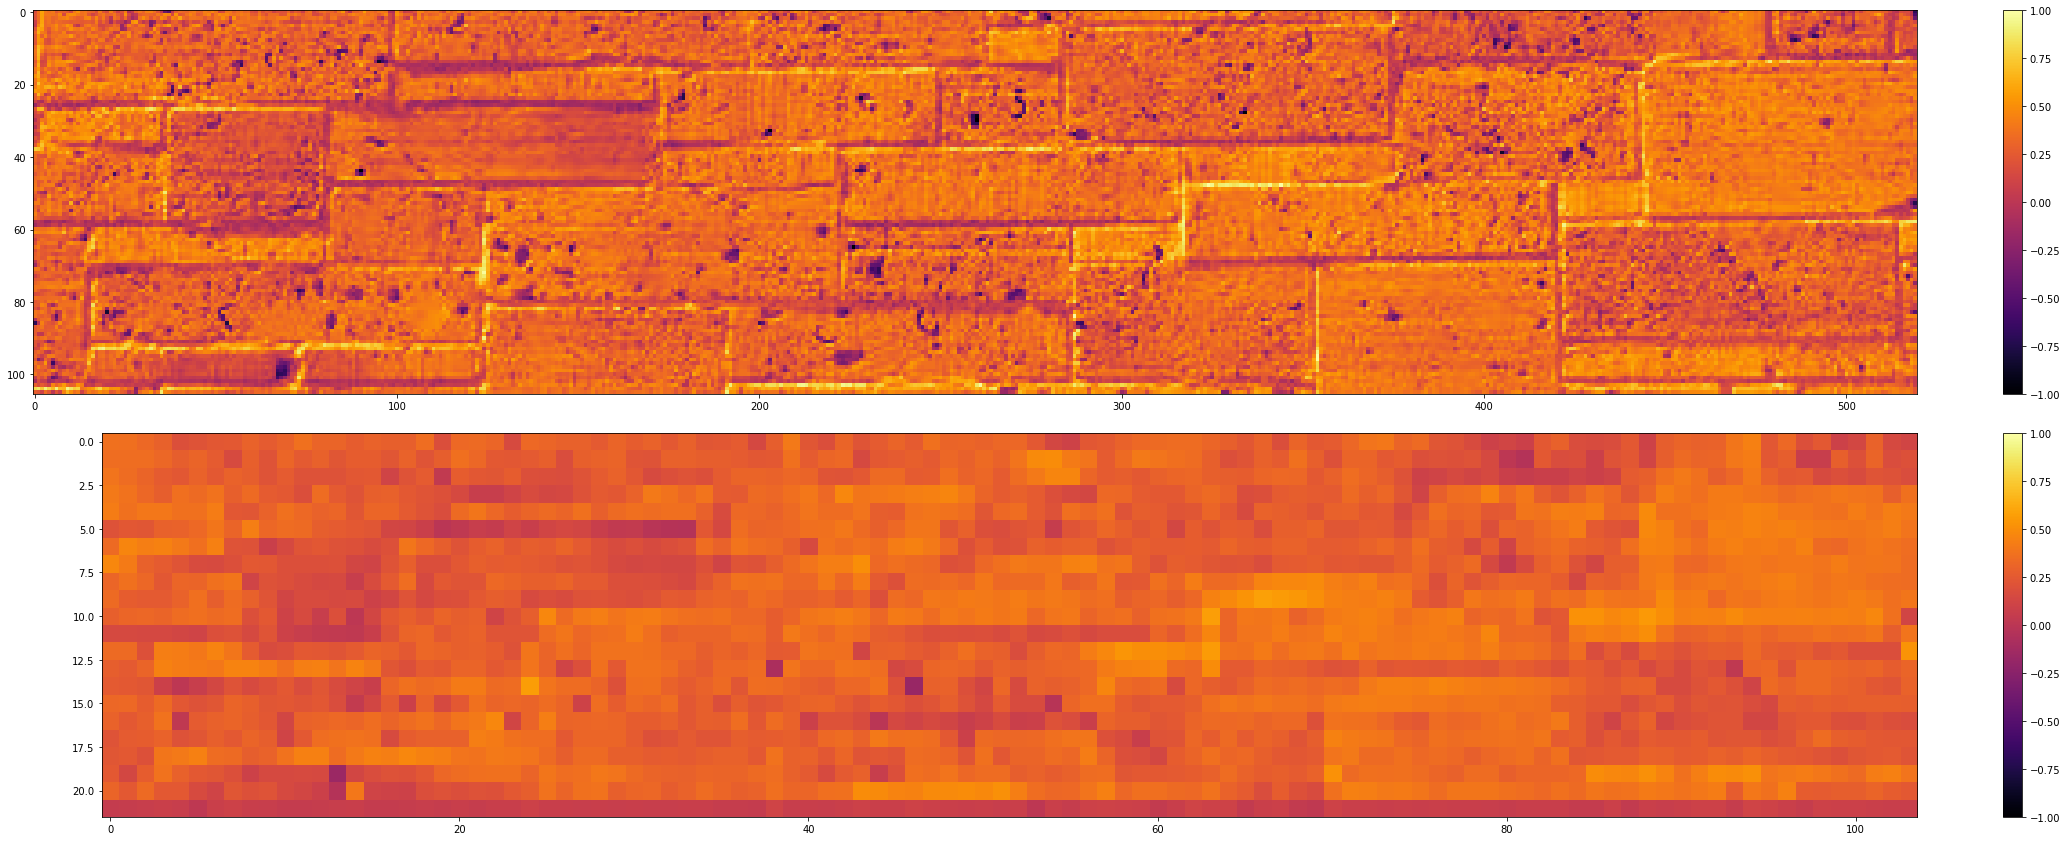

In [8]:
#filter_bw_nd_img = maximum_filter(bw_nd_img,size=(11,11))
window_size = 5
#maxpool_bw_nd_img = skimage.measure.block_reduce(st_bw_nd_img, (window_size,window_size), np.max)
maxpool_bw_nd_img = skimage.measure.block_reduce(st_bw_nd_img, (window_size,window_size), np.average)

plt.subplot(plt.subplot(str(plot) + "1"))
im1 = plt.imshow(st_bw_nd_img, cmap='inferno',vmin=-1.0,vmax=1.0)
plt.colorbar(im1,fraction=0.025, pad=0.04)

plt.subplot(plt.subplot(str(plot) + "2"))
im2 = plt.imshow(maxpool_bw_nd_img, cmap='inferno',vmin=-1.0,vmax=1.0)
plt.colorbar(im2,fraction=0.025, pad=0.04)

plt.subplots_adjust(left=0.0, bottom=0.0, right=5.0, top=2.8, wspace=0.1, hspace=0.1)
plt.show()

#### Activation Function

We borrow the leaky ReLU activation function from TensorFlow and apply it to our normalized image

* note, for alpha = 0.0, Leaky ReLU is ReLU. 


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



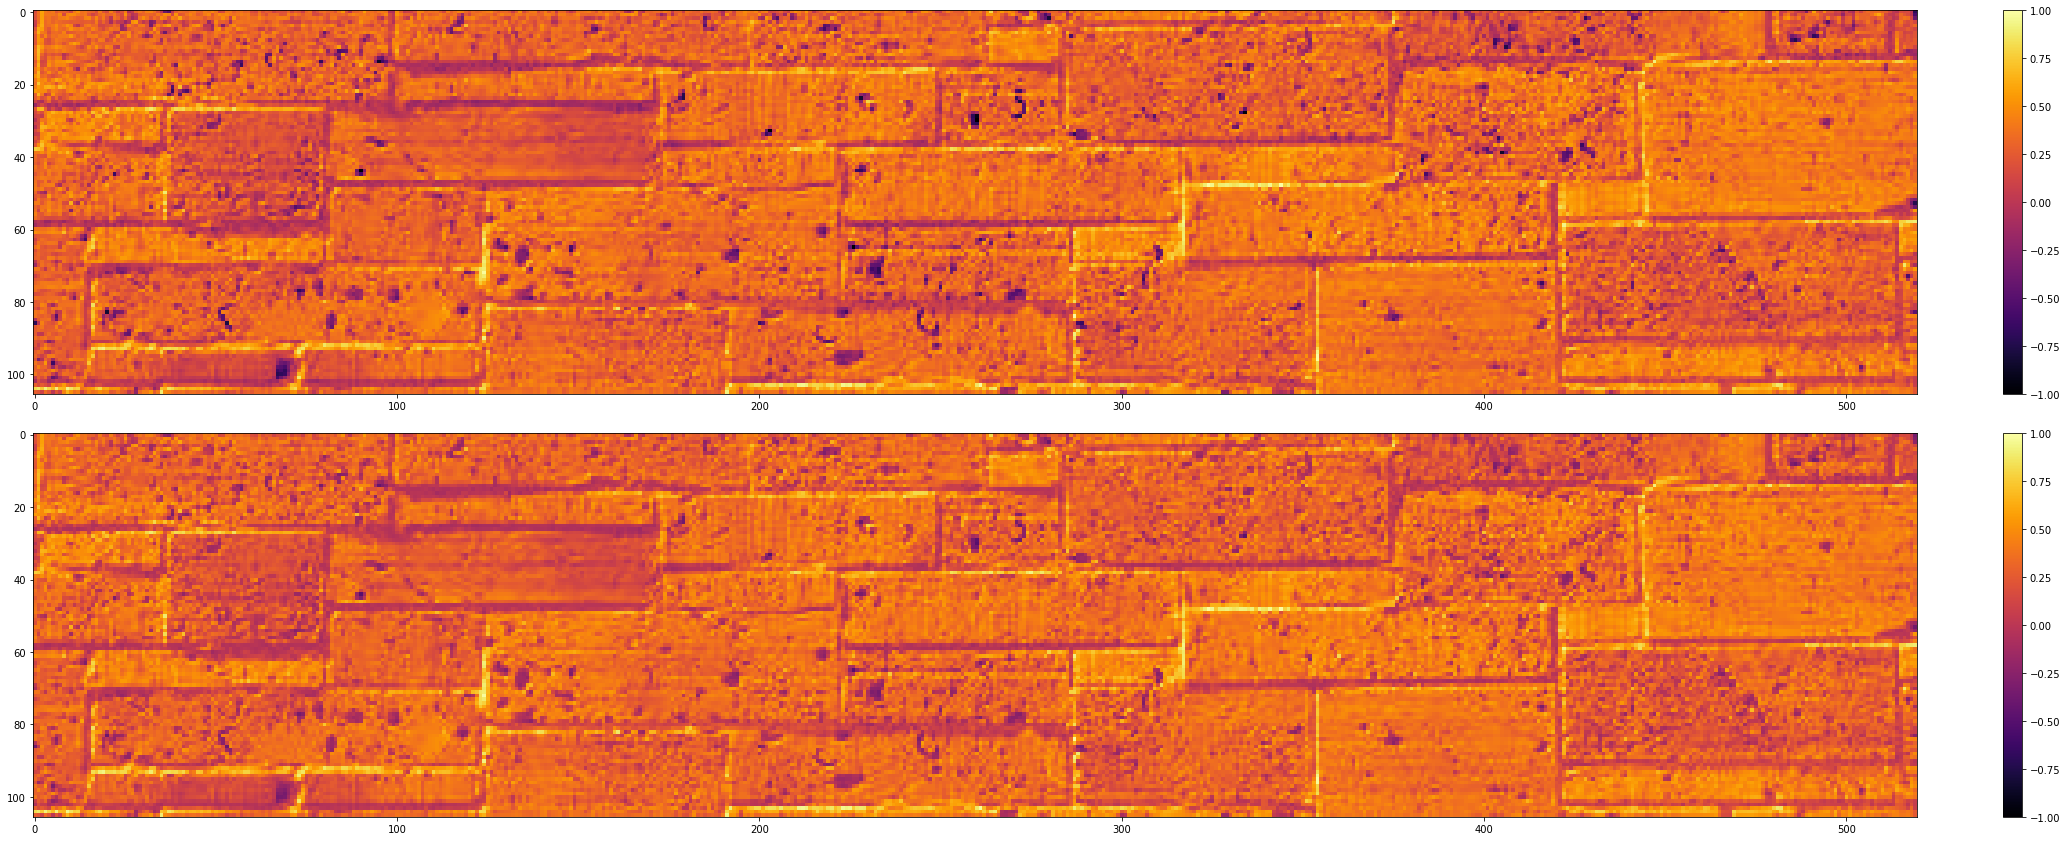

In [9]:
act_bw_nd_img = LeakyReLU(alpha=0.5)(st_bw_nd_img)

plt.subplot(str(plot) + "1")
im1 = plt.imshow(st_bw_nd_img, cmap='inferno',vmin=-1.0,vmax=1.0)
plt.colorbar(im1,fraction=0.025, pad=0.04)

plt.subplot(str(plot) + "2")
im2 = plt.imshow(act_bw_nd_img, cmap='inferno',vmin=-1.0,vmax=1.0)
plt.colorbar(im2,fraction=0.025, pad=0.04)

plt.subplots_adjust(left=0.0, bottom=0.0, right=5.0, top=2.8, wspace=0.1, hspace=0.1)
plt.show()

#### Comments

This was a basic demonstration of the operators applied in convolutional neural networks. 

Much more could be done, I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  
  